In [59]:
import pandas as pd
import numpy as np
from scipy.stats import zscore 

In [36]:
df_netflix = pd.read_csv("netflix daily top 10.csv")

In [39]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [8]:
df_netflix.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [9]:
df_netflix.tail(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


In [20]:
dtypes = df_netflix.dtypes
print("Tipos de dados disponíveis:\n")
print(dtypes)

Tipos de dados disponíveis:

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object


In [26]:
start_date = pd.to_datetime(df_netflix["As of"]).min()
end_date = pd.to_datetime(df_netflix["As of"]).max()
period = end_date - start_date

print("Período da análise feita:\n")
print(f"Início: {start_date}")
print(f"Fim: {end_date}")
print(f"Período: {period}")

Período da análise feita:

Início: 2020-04-01 00:00:00
Fim: 2022-03-11 00:00:00
Período: 709 days 00:00:00


In [22]:
shape = df_netflix.shape
print("Tamanho da base de dados:\n")
print(f"Quantidade de dados: {shape[0]}")
print(f"Quantidade de características: {shape[1]}")

Tamanho da base de dados:

Quantidade de dados: 7100
Quantidade de características: 10


In [30]:
df_netflix.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [31]:
df_netflix.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


Rank                   Axes(0.125,0.11;0.227941x0.77)
Days In Top 10      Axes(0.398529,0.11;0.227941x0.77)
Viewership Score    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

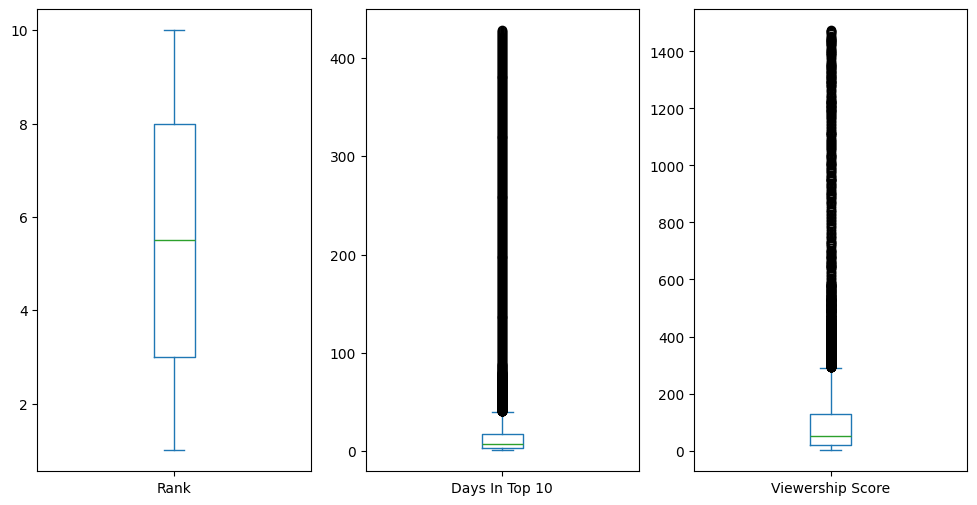

In [53]:
df_netflix.plot(kind="box", figsize=(12,6), subplots=True)

In [57]:
# Days in top 10 (Método de Tukey)

q1 = df_netflix["Days In Top 10"].quantile(0.25)
q3 = df_netflix["Days In Top 10"].quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

days_in_top_10_outliers = df_netflix[(df_netflix["Days In Top 10"] < lim_inf) | (df_netflix["Days In Top 10"] > lim_sup)]

print("Outliers - Days in top 10:\n")
print(f"Quantidade: {len(days_in_top_10_outliers)}")
days_in_top_10_outliers


Outliers - Days in top 10:

Quantidade: 743


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
438,2020-05-14,9,9,-,Ozark,TV Show,Yes,"Jul 21, 2017",41,256
447,2020-05-15,8,9,10,Ozark,TV Show,Yes,"Jul 21, 2017",42,259
458,2020-05-16,9,8,-,Ozark,TV Show,Yes,"Jul 21, 2017",43,261
489,2020-05-19,10,-,7,Ozark,TV Show,Yes,"Jul 21, 2017",44,262
629,2020-06-02,10,-,-,Outer Banks,TV Show,Yes,"Apr 15, 2020",41,291
...,...,...,...,...,...,...,...,...,...,...
7053,2022-03-07,4,3,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",42,288
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",45,306


In [61]:
# Viewership Score (Método zscore)

z = np.abs(zscore(df_netflix["Viewership Score"]))
viewership_score_outliers = df_netflix[(z > 3)]

print("Outliers - Viewership score:\n")
print(f"Quantidade: {len(viewership_score_outliers)}")
viewership_score_outliers

Outliers - Viewership score:

Quantidade: 201


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
4334,2021-06-08,5,5,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",228,770
4344,2021-06-09,5,5,5,Cocomelon,TV Show,NaN,"Jun 1, 2020",229,776
4353,2021-06-10,4,5,5,Cocomelon,TV Show,NaN,"Jun 1, 2020",230,783
4364,2021-06-11,5,4,6,Cocomelon,TV Show,NaN,"Jun 1, 2020",231,789
4375,2021-06-12,6,5,6,Cocomelon,TV Show,NaN,"Jun 1, 2020",232,794
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",427,1472
